# ST-KF Comparison
We want to use the Kalman Filter (KF) instead of the Seed Tracker (ST) to determine tracks within HPS. In order to fully adopt KF, we also need to make sure that the alignment procedure with General Broken Lines (GBL) and Millepede (MP) can still function. This document is meant to compare KF-based alignment to ST-based alignment so that we can debug the KF-based one.

MP returns delta = supposed - reality => reality = supposed - delta

In [1]:
from _differ import Differ
%matplotlib inline
import mplhep
import matplotlib.pyplot as plt
plt.style.use(mplhep.style.ROOT)

## Layer 1 Top, $\Delta y = + 100\mu$m
The first comparison is a very simple manipulation. We shift layer 1 in the top box up by 100 microns (specifically, the whole module -- paramter 11161)

Both ST and KF went successfully aligned. Below I've listed the MP-deduced alignment parameter in mm. I ran MP only allowing the parameter that I had changed to float.

**ST**:
1. 0.090370 (from 0.1 offset)
2. 0.010166 (from 0.00963 offset)
3. 0.000733 (from -0.000536 offset)
4. 0.000026 (from -0.001269 offset)
5. 0.000002 (from -0.001271 offset)

**KF**:
1. 0.069387 (from 0.1 offset)
2. 0.021440 (from 0.030613 offset)
3. 0.006703 (from 0.009173 offset)
4. 0.002120 (from 0.002470 offset)
5. 0.000644 (from 0.000350 offset)
6. 0.000211 (from -0.000294 offset)

In [2]:
d = Differ('L1t $\Delta y = +100\mu$m',
           ('kf/HPS_2019_L1ty100um_iter0/no_constraints_gblplots.root','KF iter0', dict(color='tab:blue')),
           ('st/HPS_2019_L1ty100um_iter0/no_constraints_gblplots.root','ST iter0', dict(color='tab:orange')),
#           ('kf/HPS_2019_L1ty100um_iter1/no_constraints_gblplots.root','KF iter1', dict(color='tab:green')),
#           ('st/HPS_2019_L1ty100um_iter1/no_constraints_gblplots.root','ST iter1', dict(color='tab:red')),
          )

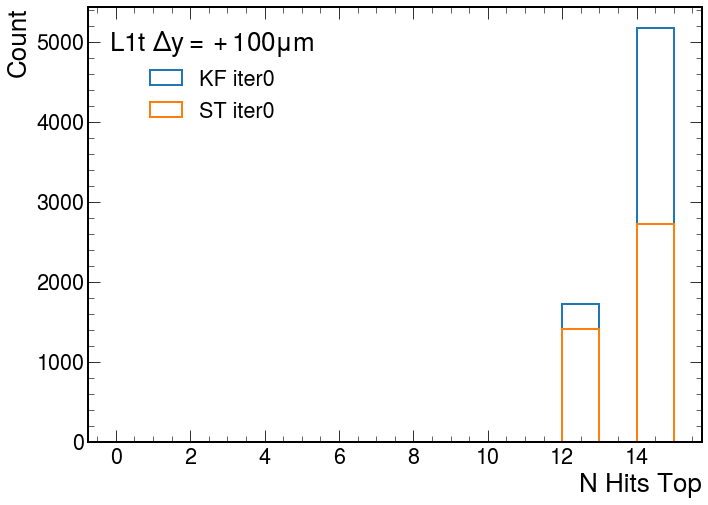

In [3]:
d.plot1d('trk_params/nHits_top','N Hits Top',ylabel='Count',yscale='linear',legend_kw=dict(loc='upper left'))

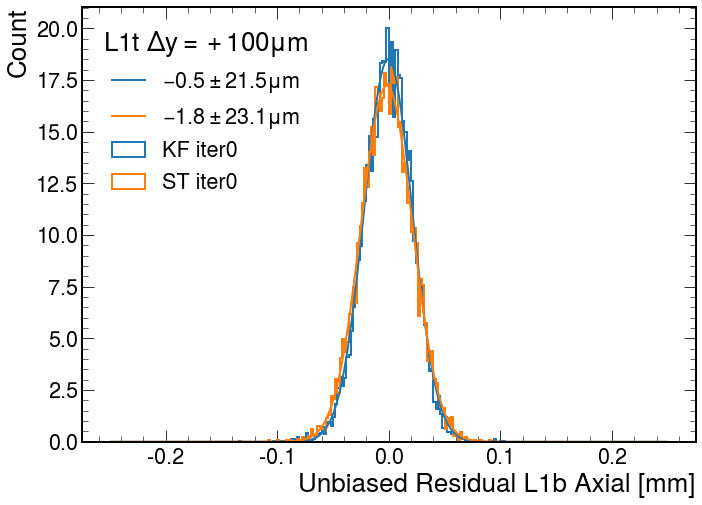

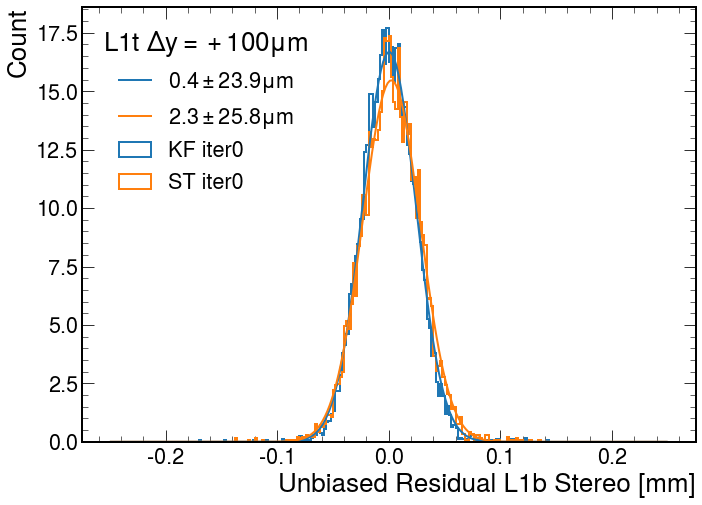

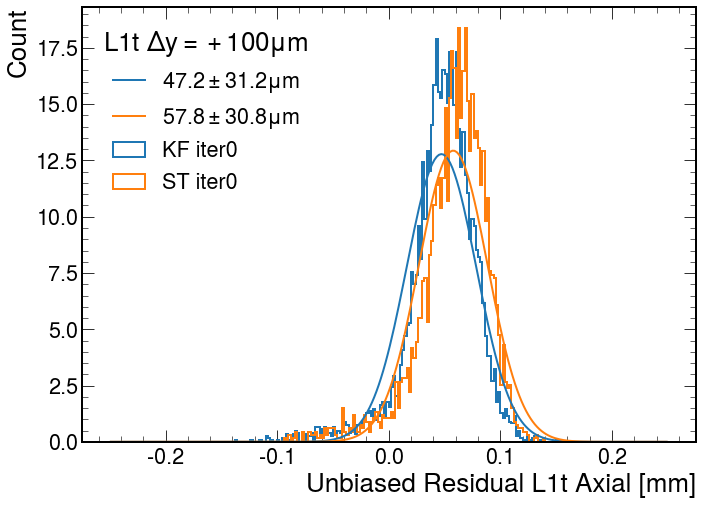

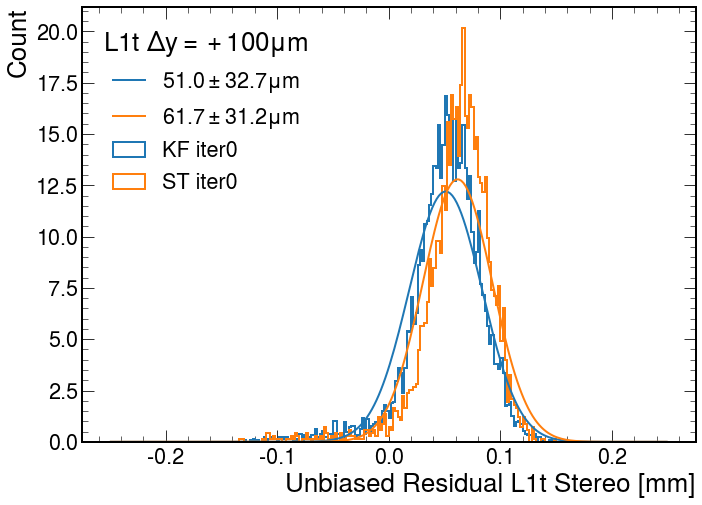

In [4]:
sensors = [
    ('L1b Axial', 'res/uresidual_GBL_module_L1b_halfmodule_axial_sensor0'),
    ('L1b Stereo', 'res/uresidual_GBL_module_L1b_halfmodule_stereo_sensor0'),
    ('L1t Axial', 'res/uresidual_GBL_module_L1t_halfmodule_axial_sensor0'),
    ('L1t Stereo', 'res/uresidual_GBL_module_L1t_halfmodule_stereo_sensor0'),
]
for name, hist in sensors :
    d.plot1d(hist, f'Unbiased Residual {name} [mm]', ylabel='Count', include_mean = 'simple', 
             density = True, yscale='linear', legend_kw = dict(loc='upper left'), draw_mean = True)

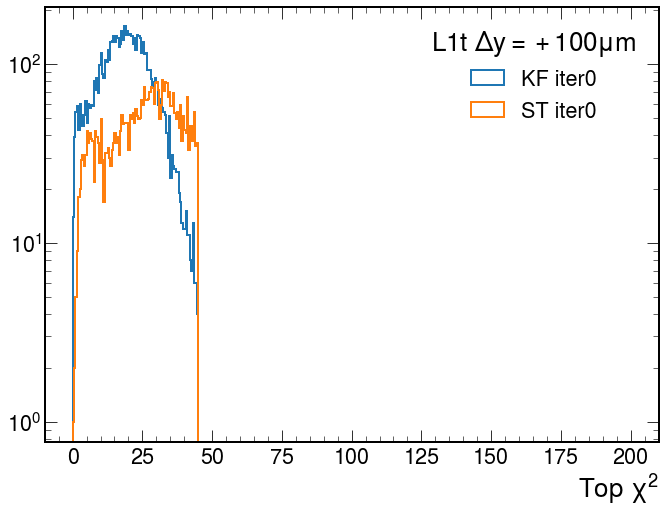

In [6]:
d.plot1d('trk_params/Chi2_top','Top $\chi^2$')

## Layer 2 Top, Axial +50 um, Stereo $\Delta y = -50\mu$m

PF: -35um